In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.preprocessing import StandardScaler



from preprocessing import *
from feature_engineering import *

import warnings
warnings.filterwarnings('ignore')

In [20]:
# from preprocessing import *

# extract_data = DataExtractor("D:\Test\IoT\hka-aqm-e", "D:\Test\IoT\historical_data")
# data = extract_data.create_df()

In [21]:
# preprocessing = DataPreprocessing(get_outliers_out=True, roll=True)
# df_csv = preprocessing.preprocess_df(data, "60min", "60min")
# df_csv.to_csv("E-Building_Data.csv", index=False)

In [2]:
df = pd.read_csv("E-Building_Data.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df.columns

Index(['date_time', 'tmp', 'hum', 'CO2', 'VOC', 'vis', 'IR', 'BLE', 'rssi',
       'snr', 'room_number', 'building_name', 'time_diff_sec', 'tmp_diff',
       'hum_diff', 'CO2_diff', 'VOC_diff', 'vis_diff', 'IR_diff', 'BLE_diff',
       'CO2_diff_per_sec', 'VOC_diff_per_sec', 'tmp_diff_per_sec',
       'hum_diff_per_sec', 'IR_diff_per_sec', 'vis_diff_per_sec', 'year',
       'month', 'dayofweek', 'hour', 'color', 'VOC_CO2_ratio'],
      dtype='object')

In [3]:
fe = FeatureEngineering(df)
df = fe.feature_engineering(n=2, categorical_features=["season"])
df.columns

Index(['date_time', 'tmp', 'hum', 'CO2', 'vis', 'room_number', 'tmp_diff',
       'hum_diff', 'CO2_diff', 'vis_diff', 'year', 'month', 'dayofweek',
       'hour', 'VOC_CO2_ratio', 'tmp-1', 'tmp-2', 'hour_sin', 'hour_cos',
       'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [4]:
# lat, long for weather station in karlsruhe
latitude = 49.0069
longitude = 8.4037
start_date = datetime(2022, 6, 2)
end_date = datetime(2023, 9, 30)
wf = WeatherFetcher(latitude, longitude, start_date, end_date)
df = wf.combine_weather(df)

In [5]:
df.room_number.unique() # 28 unique rooms

array(['e001', 'e002', 'e003', 'e004', 'e102', 'e103', 'e101', 'e301',
       'e213', 'e104', 'e304', 'e201', 'e302', 'e113', 'e305', 'e306',
       'e311', 'e303', 'e208', 'e203', 'e010', 'e109', 'e206', 'e106',
       'eu02', 'eu08', 'eu07', 'eu09'], dtype=object)

In [6]:
df = df.drop("room_number", axis=1)
result_df = df.groupby('date_time').mean().reset_index()

In [8]:
result_df
result_df['max_tmp'] = result_df.groupby(result_df['date_time'].dt.date)['tmp'].transform('max')
result_df['min_tmp'] = result_df.groupby(result_df['date_time'].dt.date)['tmp'].transform('min')

In [9]:
result_df

,date_time,tmp,hum,CO2,vis,tmp_diff,hum_diff,CO2_diff,vis_diff,year,...,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,max_tmp,min_tmp
0,2022-06-02 16:00:00,25.421111,34.181111,702.888889,36.074074,0.506960,-0.417945,-20.752621,-36.699511,1.0,...,0.0,0.0,50.0,16.9,29.0,1017.5,49.0,4.0,25.653333,24.108889
1,2022-06-02 17:00:00,25.653333,33.431569,557.941176,34.627451,0.232222,-0.749542,-144.947712,-1.446623,1.0,...,0.0,0.0,60.0,16.9,28.0,1017.3,60.0,4.0,25.653333,24.108889
2,2022-06-02 18:00:00,24.873519,34.805370,423.296296,13.907407,-0.779815,1.373802,-134.644880,-20.720044,1.0,...,0.0,0.0,50.0,17.6,30.0,1017.3,54.0,4.0,25.653333,24.108889
3,2022-06-02 19:00:00,24.480741,35.834444,421.944444,11.351852,-0.392778,1.029074,-1.351852,-2.555556,1.0,...,0.0,0.0,60.0,16.6,28.0,1017.2,50.0,4.0,25.653333,24.108889
4,2022-06-02 20:00:00,24.354151,36.368302,421.811321,10.301887,-0.126590,0.533857,-0.133124,-1.049965,1.0,...,0.0,0.0,70.0,14.4,29.0,1017.7,0.0,4.0,25.653333,24.108889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,2023-09-26 19:00:00,24.452543,49.479257,533.229342,12.963705,-0.395887,2.104676,-17.592086,-59.155288,2.0,...,0.0,0.0,130.0,4.3,10.0,1021.3,0.0,1.0,25.213560,23.446001
9724,2023-09-26 20:00:00,24.324229,50.113894,543.786923,9.560678,-0.128314,0.634637,10.557581,-3.403027,2.0,...,0.0,0.0,200.0,2.5,4.0,1021.6,0.0,1.0,25.213560,23.446001
9725,2023-09-26 21:00:00,24.326334,49.526058,545.712229,7.343795,0.002105,-0.587836,1.925307,-2.216883,2.0,...,0.0,0.0,130.0,3.6,7.0,1021.7,0.0,1.0,25.213560,23.446001
9726,2023-09-26 22:00:00,24.242412,49.262954,543.912103,7.099928,-0.083922,-0.263104,-1.800126,-0.243867,2.0,...,0.0,0.0,180.0,3.6,5.0,1021.8,0.0,1.0,25.213560,23.446001


In [13]:
fig = px.line(result_df, x='date_time', y='tmp', title='Temperature of CO2-Sensor')
fig.show()


In [37]:
df.columns

Index(['date_time', 'tmp', 'hum', 'CO2', 'vis', 'tmp_diff', 'hum_diff',
       'CO2_diff', 'vis_diff', 'year', 'month', 'dayofweek', 'hour',
       'VOC_CO2_ratio', 'tmp-1', 'tmp-2', 'hour_sin', 'hour_cos',
       'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter',
       'temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'coco'],
      dtype='object')

In [38]:
# "time_diff_sec", "tmp_diff", "tmp_diff_per_sec", "year", "month", "dayofweek", "hour"
df_tmp = result_df
df_tmp = df_tmp[["date_time", "tmp", 'tmp-1','tmp-2', 'min_tmp', 'max_tmp', 'hour_sin', 'hour_cos',
       'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'season_autumn', 'season_spring', 'season_summer', 'season_winter']]

In [40]:
df_tmp

,date_time,tmp,tmp-1,tmp-2,min_tmp,max_tmp,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,season_autumn,season_spring,season_summer,season_winter
0,2022-06-02 16:00:00,25.421111,24.914151,24.323143,24.108889,25.653333,-0.866025,-5.000000e-01,0.433884,-0.900969,1.224647e-16,-1.000000e+00,0.0,1.0,0.0,0.0
1,2022-06-02 17:00:00,25.653333,25.421111,24.914151,24.108889,25.653333,-0.965926,-2.588190e-01,0.433884,-0.900969,1.224647e-16,-1.000000e+00,0.0,1.0,0.0,0.0
2,2022-06-02 18:00:00,24.873519,25.653333,25.421111,24.108889,25.653333,-1.000000,-1.836970e-16,0.433884,-0.900969,1.224647e-16,-1.000000e+00,0.0,1.0,0.0,0.0
3,2022-06-02 19:00:00,24.480741,24.873519,25.653333,24.108889,25.653333,-0.965926,2.588190e-01,0.433884,-0.900969,1.224647e-16,-1.000000e+00,0.0,1.0,0.0,0.0
4,2022-06-02 20:00:00,24.354151,24.480741,24.873519,24.108889,25.653333,-0.866025,5.000000e-01,0.433884,-0.900969,1.224647e-16,-1.000000e+00,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,2023-09-26 19:00:00,24.452543,24.510826,24.555176,23.446001,25.213560,-0.965926,2.588190e-01,0.781831,0.623490,-1.000000e+00,-1.836970e-16,1.0,0.0,0.0,0.0
9724,2023-09-26 20:00:00,24.324229,24.387462,24.378490,23.446001,25.213560,-0.866025,5.000000e-01,0.781831,0.623490,-1.000000e+00,-1.836970e-16,1.0,0.0,0.0,0.0
9725,2023-09-26 21:00:00,24.326334,24.276284,24.304476,23.446001,25.213560,-0.707107,7.071068e-01,0.781831,0.623490,-1.000000e+00,-1.836970e-16,1.0,0.0,0.0,0.0
9726,2023-09-26 22:00:00,24.242412,24.267584,24.191285,23.446001,25.213560,-0.500000,8.660254e-01,0.781831,0.623490,-1.000000e+00,-1.836970e-16,1.0,0.0,0.0,0.0


### Naive prediction’s error

In [41]:
weather_naive = df_tmp[['date_time', 'tmp']].copy(deep=True)
weather_naive['prev_temperature'] = weather_naive['tmp'].shift(1)
weather_naive.dropna(inplace=True)
weather_naive['difference'] = weather_naive['tmp'] - weather_naive['prev_temperature']
weather_naive['square_error'] = weather_naive['difference'] ** 2

square_error = weather_naive['square_error'].mean()
print(f'Square Error of the Naive Approach is {square_error:.3f}')

Square Error of the Naive Approach is 0.023


In [42]:
temp_LSTM = df_tmp.copy(deep=True)
temp_LSTM.columns

Index(['date_time', 'tmp', 'tmp-1', 'tmp-2', 'min_tmp', 'max_tmp', 'hour_sin',
       'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin',
       'month_cos', 'season_autumn', 'season_spring', 'season_summer',
       'season_winter'],
      dtype='object')

In [43]:
input_data = temp_LSTM.drop(['date_time', "tmp"], axis=1).values
targets = temp_LSTM['tmp'].values
T = 1                      #Number of timesteps to look while predicting
D = input_data.shape[1]   #Dimensionality of the input
N = len(input_data) - T

In [44]:
#Train size: 80% of the total data size
train_size = int(len(input_data) * 0.80)

# Normalization of the inputs
scaler = StandardScaler()
scaler.fit(input_data[:train_size + T - 1])
input_data = scaler.transform(input_data)

# Preparing X_train and y_train
X_train = np.zeros((train_size, T, D))
y_train = np.zeros((train_size, 1))

for t in range(train_size):
  X_train[t, :, :] = input_data[t:t+T]
  y_train[t] = (targets[t+T])

# Preparing X_test and y_test
X_test = np.zeros((N - train_size, T, D))
y_test = np.zeros((N - train_size, 1))

for i in range(N - train_size):
  t = i + train_size
  X_test[i, :, :] = input_data[t:t+T]
  y_test[i] = (targets[t+T])

# Make inputs and targets
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [45]:
X_train.shape, y_train.shape

(torch.Size([7782, 1, 14]), torch.Size([7782, 1]))

In [46]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [47]:
class LSTM(nn.Module):
  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
    super(LSTM, self).__init__()
    self.M = hidden_dim
    self.L = layer_dim

    self.lstm = nn.LSTM(
        input_size=input_dim,
        hidden_size=hidden_dim,
        num_layers=layer_dim,
        batch_first=True)
    
    # Dropout layer
    self.dropout = nn.Dropout(p=0.5)
    
    #batch_first to have (batch_dim, seq_dim, feature_dim)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, X):
    # initial hidden state and cell state
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    out, (hn, cn) = self.lstm(X, (h0.detach(), c0.detach()))

    # h(T) at the final time step
    out = self.fc(out[:, -1, :])
    return out

In [65]:
class LSTM_GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim_lstm, hidden_dim_gru, layer_dim, output_dim):
        super(LSTM_GRU, self).__init__()
        self.hidden_dim_lstm = hidden_dim_lstm
        self.hidden_dim_gru = hidden_dim_gru
        self.layer_dim = layer_dim


        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim_lstm,
            num_layers=layer_dim,
            batch_first=True
        )

        # GRU layer
        self.gru = nn.GRU(
            input_size=hidden_dim_lstm,
            hidden_size=hidden_dim_gru,
            num_layers=layer_dim,
            batch_first=True,
    
        )   

        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim_gru, output_dim)

    def forward(self, X):
        # Initialize hidden state and cell state for LSTM
        h0_lstm = torch.zeros(self.layer_dim, X.size(0), self.hidden_dim_lstm).to(device)
        c0_lstm = torch.zeros(self.layer_dim, X.size(0), self.hidden_dim_lstm).to(device)

        # Forward propagate LSTM
        out_lstm, _ = self.lstm(X, (h0_lstm, c0_lstm))

        # Initialize hidden state for GRU
        h0_gru = torch.zeros(self.layer_dim, X.size(0), self.hidden_dim_gru).to(device)

        # Forward propagate GRU
        out_gru, _ = self.gru(out_lstm, h0_gru)

        # Select the output of the last time step and pass through the fully connected layer
        out = self.fc(out_gru[:, -1, :])
        return out

In [66]:
model = LSTM(D, 64, 1, 1)
model.to(device)

LSTM(
  (lstm): LSTM(14, 64, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [67]:
model2 = LSTM_GRU(D, 64, 32, 1, 1)
model2.to(device)

LSTM_GRU(
  (lstm): LSTM(14, 64, batch_first=True)
  (gru): GRU(64, 32, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [68]:
# Training
def train(model,
          learning_rate,
          X_train,
          y_train,
          X_test,
          y_test,
          epochs=10):

  # Loss and optimizer
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    #Train loss
    train_losses[epoch] = loss.item()

    # Test loss
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[epoch] = test_loss.item()

    if (epoch + 1) % 20 == 0:
      print(f'At epoch {epoch+1} of {epochs}, Train Loss: {loss.item():.3f}, Test Loss: {test_loss.item():.3f}')

  return train_losses, test_losses

In [69]:
# move data to GPU
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

train_losses1, test_losses1 = train(model,
                                    0.001,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test,
                                    epochs=3000)

At epoch 20 of 3000, Train Loss: 529.362, Test Loss: 689.451
At epoch 40 of 3000, Train Loss: 520.670, Test Loss: 668.420
At epoch 60 of 3000, Train Loss: 506.095, Test Loss: 634.489
At epoch 80 of 3000, Train Loss: 484.399, Test Loss: 589.143
At epoch 100 of 3000, Train Loss: 456.504, Test Loss: 537.680
At epoch 120 of 3000, Train Loss: 424.423, Test Loss: 484.884
At epoch 140 of 3000, Train Loss: 390.243, Test Loss: 434.460
At epoch 160 of 3000, Train Loss: 355.724, Test Loss: 388.271
At epoch 180 of 3000, Train Loss: 322.085, Test Loss: 346.703
At epoch 200 of 3000, Train Loss: 290.014, Test Loss: 309.543
At epoch 220 of 3000, Train Loss: 259.876, Test Loss: 276.388
At epoch 240 of 3000, Train Loss: 231.852, Test Loss: 246.802
At epoch 260 of 3000, Train Loss: 206.040, Test Loss: 220.385
At epoch 280 of 3000, Train Loss: 182.489, Test Loss: 196.783
At epoch 300 of 3000, Train Loss: 161.209, Test Loss: 175.695
At epoch 320 of 3000, Train Loss: 142.174, Test Loss: 156.857
At epoch 340

In [70]:
# X_train, y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

# train_losses2, test_losses2 = train(model2,
#                                     0.001,
#                                     X_train,
#                                     y_train,
#                                     X_test,
#                                     y_test,
#                                     epochs=3000)

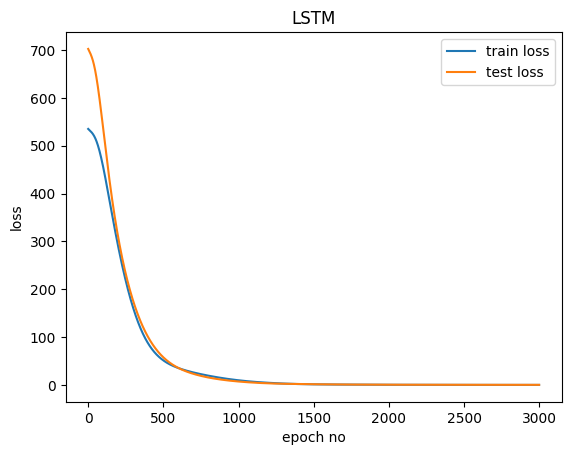

In [71]:
plt.plot(train_losses1, label='train loss')
plt.plot(test_losses1, label='test loss')
plt.title("LSTM")
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

In [72]:
# plt.plot(train_losses2, label='train loss')
# plt.plot(test_losses2, label='test loss')
# plt.title("LSTM_GRU")
# plt.xlabel('epoch no')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

In [73]:
#Checking one-step prediction performance of the model
test_target1 = y_test.cpu().detach().numpy()
test_predictions1 = []

for i in range(len(test_target1)):
  input_ = X_test[i].reshape(1, T, D)
  p = model(input_)[0,0].item()

  # update the predictions list
  test_predictions1.append(p)


In [74]:
# test_target2 = y_test.cpu().detach().numpy()
# test_predictions2 = []

# for i in range(len(test_target2)):
#   input_ = X_test[i].reshape(1, T, D)
#   p = model2(input_)[0,0].item()

#   # update the predictions list
#   test_predictions2.append(p)

In [75]:
plot_df = df_tmp[['date_time', 'tmp']].copy(deep=True)
plot_df

,date_time,tmp
0,2022-06-02 16:00:00,25.421111
1,2022-06-02 17:00:00,25.653333
2,2022-06-02 18:00:00,24.873519
3,2022-06-02 19:00:00,24.480741
4,2022-06-02 20:00:00,24.354151
...,...,...
9723,2023-09-26 19:00:00,24.452543
9724,2023-09-26 20:00:00,24.324229
9725,2023-09-26 21:00:00,24.326334
9726,2023-09-26 22:00:00,24.242412


In [76]:
plot_len1 = len(test_predictions1)
plot_df1 = df_tmp[['date_time', 'tmp']].copy(deep=True)
plot_df1 = plot_df1.iloc[-plot_len1:]
plot_df1['prediction'] = test_predictions1
plot_df1.set_index('date_time', inplace=True)
plot_df1.head()

,tmp,prediction
date_time,,
2023-06-05 06:00:00,24.429896,24.603186
2023-06-05 07:00:00,24.463793,24.647808
2023-06-05 08:00:00,24.602961,24.567869
2023-06-05 09:00:00,24.681637,24.822411
2023-06-05 10:00:00,24.861173,24.931679


In [77]:
# plot_len2 = len(test_predictions2)
# plot_df2 = df_tmp[['date_time', 'tmp']].copy(deep=True)
# plot_df2 = plot_df.iloc[-plot_len2:]
# plot_df2['prediction'] = test_predictions2
# plot_df2.set_index('date_time', inplace=True)
# plot_df2.head()

In [78]:
from sklearn.metrics import mean_squared_error

print("RMSE for trainset:", mean_squared_error(model(X_train).detach().numpy(), y_train.numpy()))
print("RMSE for testset:", mean_squared_error(model(X_test).detach().numpy(), y_test.numpy()))

RMSE for trainset: 0.09082659
RMSE for testset: 0.26783124


In [79]:
# from sklearn.metrics import mean_squared_error

# # cycling encoding
# print("RMSE for trainset:", mean_squared_error(model2(X_train).detach().numpy(), y_train.numpy()))
# print("RMSE for testset:", mean_squared_error(model2(X_test).detach().numpy(), y_test.numpy()))

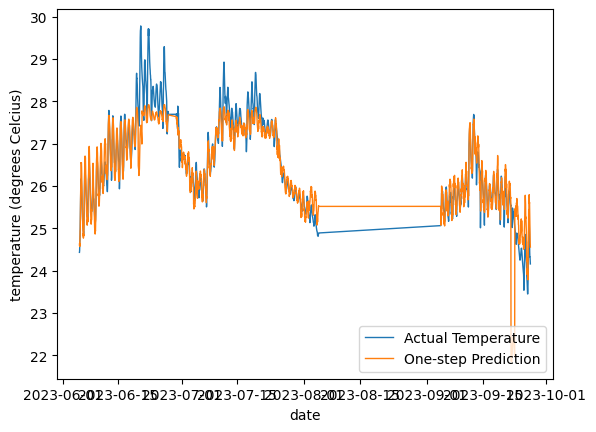

In [80]:
plt.plot(plot_df1['tmp'], label='Actual Temperature', linewidth=1)
plt.plot(plot_df1['prediction'], label='One-step Prediction', linewidth=1)
plt.xlabel('date')
plt.ylabel('temperature (degrees Celcius)')
plt.legend(loc='lower right')

In [81]:
# plt.plot(plot_df2['tmp'], label='Actual Temperature', linewidth=1)
# plt.plot(plot_df2['prediction'], label='One-step Prediction', linewidth=1)
# plt.title("LSTM_GRU with cycling endcoding")
# plt.xlabel('date')
# plt.ylabel('temperature (degrees Celcius)')
# plt.legend(loc='lower right')